<a href="https://colab.research.google.com/github/dezlorator1/DSS/blob/main/multispectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization,Activation,MaxPooling2D
from PIL import Image
from google.colab import drive
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from io import BytesIO  
from keras.constraints import maxnorm

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


ФЛЕКС С КАРТИНКАМИ

In [ ]:
# Перевод в GreyScale
gray = Image.open(r'/content/drive/MyDrive/img/x_test.jpg')
grayscale = gray.convert('L')
grayscale.save(r'/content/drive/MyDrive/img/' + 'x_test_grey.jpg', 'JPEG')

In [ ]:
# Нарезать фото
chopsize = 50
infile = r"/content/drive/MyDrive/img/x_test.png"
outfile = r"/content/drive/MyDrive/image_cut/x_test/img_cut/"
img = Image.open(infile)
width, height = img.size
count = 0 ;
# Save Chops of original image
for x0 in range(0, width, chopsize):
   for y0 in range(0, height, chopsize):
      box = (x0, y0,
             x0+chopsize if x0+chopsize <  width else  width - 1,
             y0+chopsize if y0+chopsize < height else height - 1)
      if(count<10):
        img.crop(box).save(outfile + '00'+ f'{count}' + '.png', "PNG")
      elif (count <100):
        img.crop(box).save(outfile + '0'+ f'{count}' + '.png', "PNG")
      else:
        img.crop(box).save(outfile + f'{count}' + '.png', "PNG")
      count = count + 1

In [ ]:
# Превращение фотографии в 4 цвета
rgb = Image.open(r'/content/drive/MyDrive/img/y_test.png')
for x in range(2400):
  for y in range(1000):
    val = rgb.getpixel((x, y))
    r, g, b, all = val
    if(r>200 and g>200 and b> 200):
      rgb.putpixel((x, y), (255, 255, 255))
    elif (g>100):
      rgb.putpixel((x, y), (0, 255, 0))
    elif ((r > 100 or b> 100) and g<100):
      rgb.putpixel((x, y), (255, 0 , 0)) 
    else :
      rgb.putpixel((x, y), (0, 0 , 0))
rgb  


In [ ]:
rgb.save(r'/content/drive/MyDrive/img/' + 'y_4color_test.png', 'PNG')

РАЗДЕЛЕНИЕ НА 3 КАРТИНКИ ПО 2 ЦВЕТА


In [ ]:
# КРАСНЫЙ
r_img = Image.open(r'/content/drive/MyDrive/img/y_4color.png')
for x in range(2400):
  for y in range(1000):
    val = r_img.getpixel((x, y))
    r, g, b, all = val
    if (r==255 and g==0 and b==0):
      r_img.putpixel((x, y), (255, 0 , 0))
    else:
      r_img.putpixel((x, y), (0, 0 , 0))      
r_img  

In [ ]:
# ЗЕЛЕНЫЙ
g_img = Image.open(r'/content/drive/MyDrive/img/y_4color.png')
for x in range(2400):
  for y in range(1000):
    val = g_img.getpixel((x, y))
    r, g, b, all = val
    if (r==0 and g==255 and b==0):
      g_img.putpixel((x, y), (0, 255 , 0))
    else:
      g_img.putpixel((x, y), (0, 0 , 0))      
g_img  

In [ ]:
# БЕЛЫЙ
w_img = Image.open(r'/content/drive/MyDrive/img/y_4color.png')
for x in range(2400):
  for y in range(1000):
    val = w_img.getpixel((x, y))
    r, g, b, all = val
    if (r==255 and g==255 and b==255):
      w_img.putpixel((x, y), (255, 255 , 255))
    else:
      w_img.putpixel((x, y), (0, 0 , 0))      
w_img  

In [ ]:
r_img.save(r'/content/drive/MyDrive/img/' + 'y_r.png', 'PNG')
g_img.save(r'/content/drive/MyDrive/img/' + 'y_g.png', 'PNG')
w_img.save(r'/content/drive/MyDrive/img/' + 'y_w.png', 'PNG')

ЗАГОТОВКА МАССИВАВ ДАННЫХ

In [ ]:
img_4color = Image.open(r'/content/drive/MyDrive/img/y_4color.png')
y_arr = np.zeros(shape=(2400000,1), dtype='i')
count = 0

for x in range(2400):
  for y in range(1000):
    val = img_4color.getpixel((x, y))
    r, g, b, a = val
    if (r<50 and g>220 and b<50):
      y_arr[count] = 1
    elif (r>220 and g<50 and b<50):
      y_arr[count] = 2
    elif (r<50 and g<50 and b<50):
      y_arr[count]= 3

    count = count + 1 


In [ ]:
img_x = Image.open(r'/content/drive/MyDrive/img/x.png')
x_arr = np.zeros(shape=(2400000,3), dtype='f')
count = 0

for x in range(2400):
  for y in range(1000):
    val = img_x.getpixel((x, y))
    r, g, b, a = val
    x_arr[count][0] = r / 255
    x_arr[count][1] = g / 255
    x_arr[count][2] = b / 255
    count = count + 1 

In [ ]:
img_x = Image.open(r'/content/drive/MyDrive/img/x_test.png')
test_x_arr = np.zeros(shape=(2400000,3), dtype='f')
count = 0

for x in range(2400):
  for y in range(1000):
    val = img_x.getpixel((x, y))
    r, g, b, a = val
    test_x_arr[count][0] = r / 255
    test_x_arr[count][1] = g / 255
    test_x_arr[count][2] = b / 255
    count = count + 1 

In [ ]:
img_4color_test = Image.open(r'/content/drive/MyDrive/img/y_4color_test.png')
test_y_arr = np.zeros(shape=(2400000,1), dtype='i')
count = 0

for x in range(2400):
  for y in range(1000):
    val = img_4color_test.getpixel((x, y))
    r, g, b, a = val
    if (r<50 and g>220 and b<50):
      test_y_arr[count] = 1
    elif (r>220 and g<50 and b<50):
      test_y_arr[count] = 2
    elif (r<50 and g<50 and b<50):
      test_y_arr[count]= 3

    count = count + 1 

ЗАГОТОВКА С ФОТО В 2 ЦЫЕТАХ

In [ ]:
img_2color = Image.open(r'/content/drive/MyDrive/img/y_r.png')
y_arr = np.zeros(shape=(2400000,1), dtype='i')
count = 0

for x in range(2400):
  for y in range(1000):
    val = img_2color.getpixel((x, y))
    r, g, b, a = val
    if (r<50 and g>220 and b<50):
      y_arr[count] = 1
    elif (r>220 and g<50 and b<50):
      y_arr[count] = 2
    elif (r<50 and g<50 and b<50):
      y_arr[count]= 3

    count = count + 1 

ОЛДОВАЯ ЗАГОТОВКА

In [ ]:
def activate_dataframe (dir):
  train_directory = rf'{dir}'
  dataframe = ImageDataGenerator(rescale=1. / 255)
  dataframe_generator = dataframe.flow_from_directory(
      train_directory,
      target_size=(50, 50),
      color_mode="rgb",
      class_mode='categorical',
      batch_size=960,
      shuffle=False
  )
  df, _ = dataframe_generator.next()
  return df

In [ ]:
#Обучащий черный
x = activate_dataframe(r"/content/drive/MyDrive/image_cut/x")
#Обучащий цветной
y = activate_dataframe(r"/content/drive/MyDrive/image_cut/y")
#Тестовый черный
x_test = activate_dataframe(r"/content/drive/MyDrive/image_cut/x_test")
#Тестовый цветной
#y_test = activate_dataframe(r"/content/drive/MyDrive/new_volgograd_color")

Found 960 images belonging to 1 classes.
Found 960 images belonging to 1 classes.
Found 960 images belonging to 1 classes.


In [ ]:
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
for i in range(2400000):
  if (arr_type[i] == 0):
    count_0 = count_0 + 1
  elif (arr_type[i] == 1):
    count_1 = count_1 + 1
  elif (arr_type[i] == 2):
    count_2 = count_2 + 1
  elif (arr_type[i] == 3):
    count_3 = count_3 + 1
  elif (arr_type[i] == 4):
    count_4 = count_4 + 1

print('0 =', count_0, '1 =', count_1, '2 =', count_2, '3 =', count_3)

0 = 164690 1 = 113911 2 = 387760 3 = 1733639


In [ ]:
y[200]

НЕЙРОНКА

In [ ]:
#Нейронка для картинок
model = keras.Sequential([
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3)),
    Dense(500, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3))
])

In [ ]:
#Нейронка для черно-белой картинки
model = keras.Sequential([
    Dense(3, activation = "relu",input_shape=(3,)),
    Dense(8, activation='softmax'),
    Dropout(0.5),
    Dense(4, activation='softmax'),
    Dropout(0.5),

    Dense(4, activation='relu')
])

In [ ]:
#Нейронка для БЕЛОЙ картинки
model = keras.Sequential([
    Dense(16, activation = "elu",input_shape=(3,)),
    Dense(32, activation='softmax'),
    Dropout(0.5),
    Dense(64, activation='softmax'),
    Dropout(0.5),
    Dense(32, activation='softmax'),
    Dropout(0.5),
    Dense(16, activation='softmax'),
    Dense(4, activation='relu')
])

In [ ]:
print(model.summary()) 

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_arr, y_arr, batch_size=32, epochs=2, validation_split=0.10)

Epoch 1/2
67500/67500 [==============================] - 86s 1ms/step - loss: 1.7946 - accuracy: 0.0874 - val_loss: 1.3864 - val_accuracy: 0.0419
Epoch 2/2
67500/67500 [==============================] - 80s 1ms/step - loss: 1.3864 - accuracy: 0.0806 - val_loss: 1.3864 - val_accuracy: 0.0419


In [ ]:
model.evaluate(test_x_arr, test_y_arr)

75000/75000 [==============================] - 68s 903us/step - loss: 1.3852 - accuracy: 0.0129


[1.385237455368042, 0.012904583476483822]

In [ ]:
predictions = model.predict(test_x_arr)

In [ ]:
predictions[1000200:1000400]

In [ ]:
count_green = 0;
for i in range (2400000):
  a = predictions[i]
  max = np.argmax(a)
  if (max==0):
    count_green = count_green+1
count_green    

0

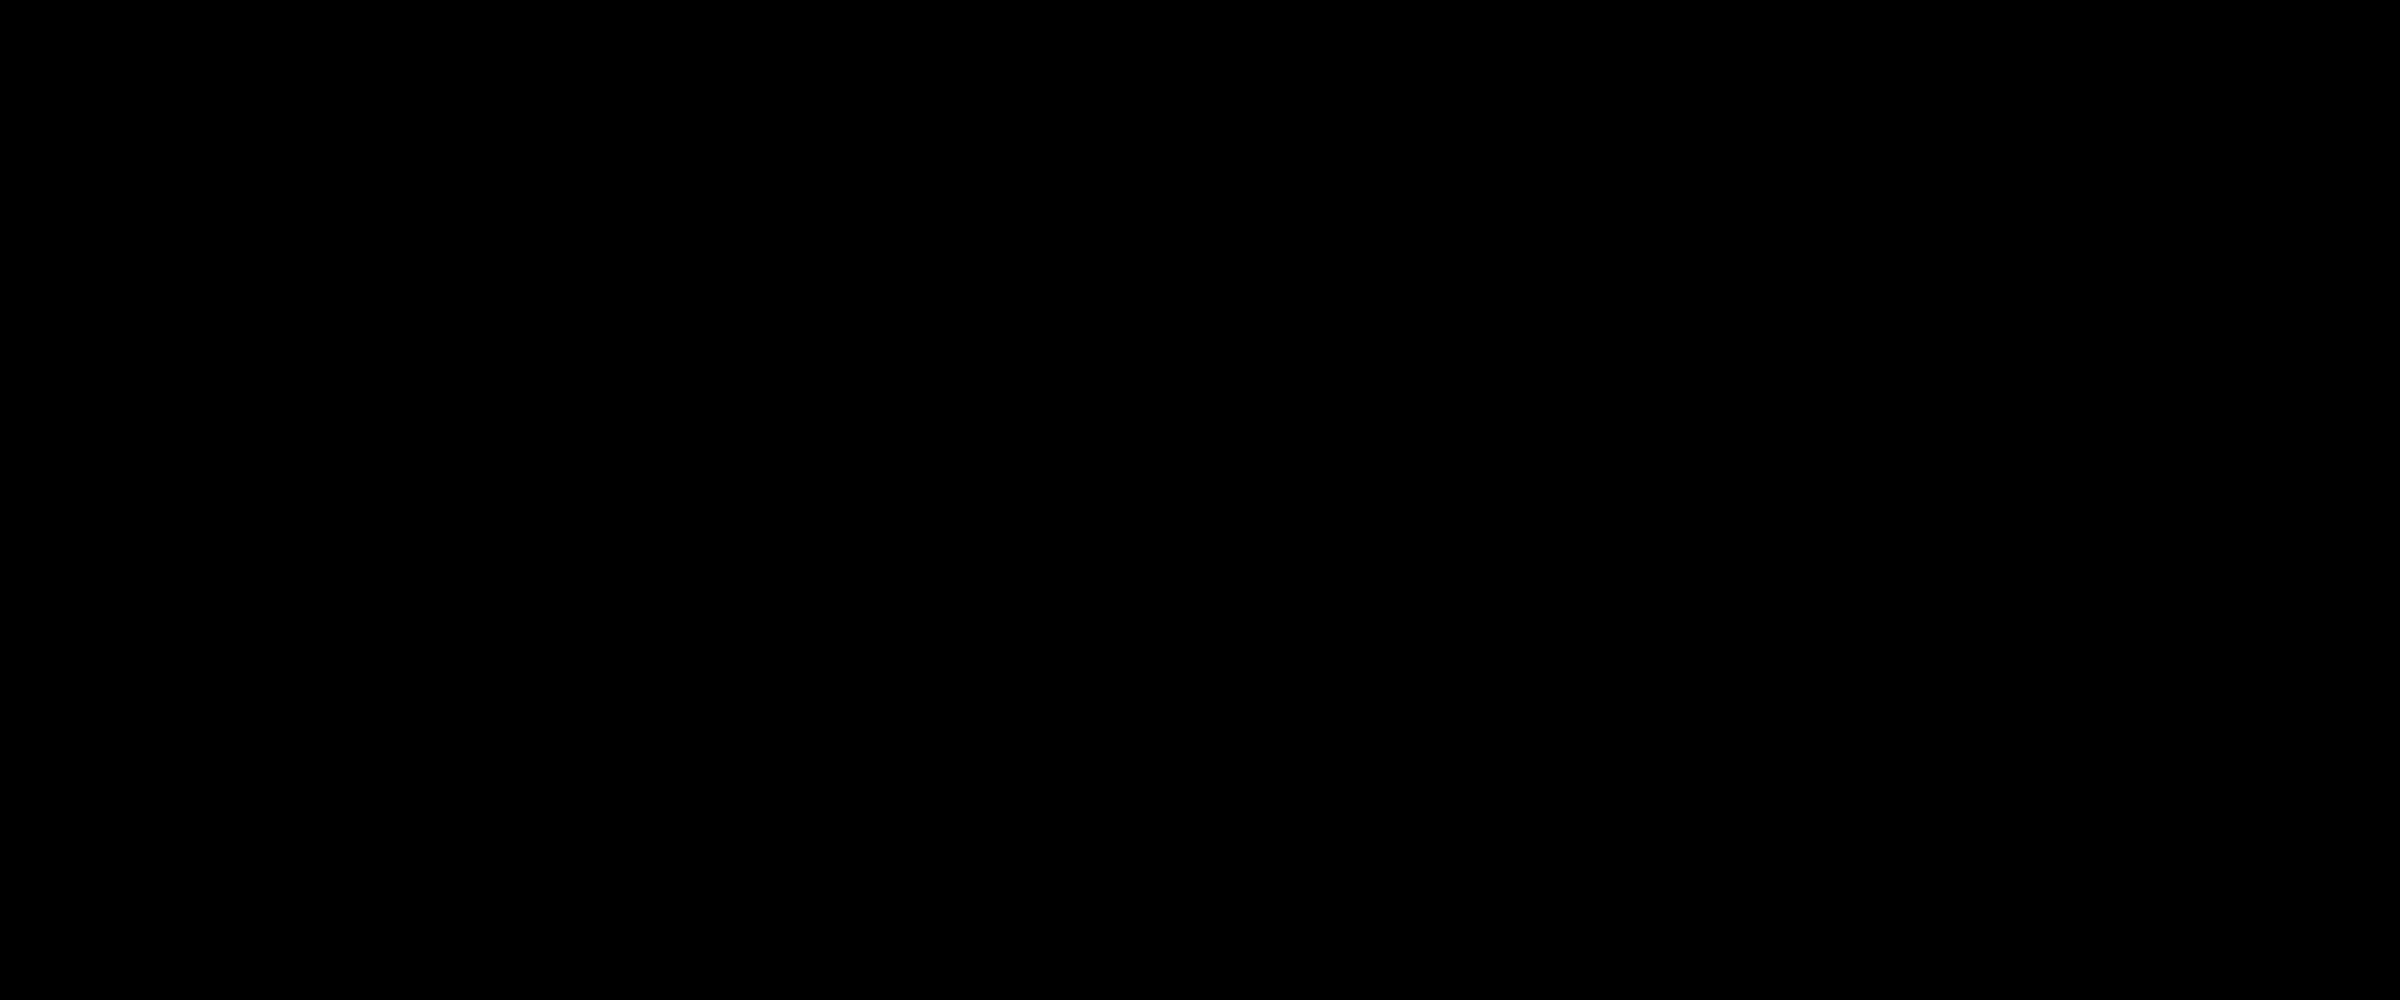

In [ ]:
#Белый, Зеленый, Красный, Черный
img = Image.new('RGB', (2400, 1000))
#img = Image.open(r'/content/drive/MyDrive/img/x_test.png')
count = 0;
for x in range(2400):
  for y in range(1000):
    a = predictions[count]
    max = np.argmax(a)
    if (max == 0):
      img.putpixel((x, y), (255, 255 , 255)) 
    elif (max == 1):
      img.putpixel((x, y), (0, 255 , 0)) 
    elif (max == 2):
      img.putpixel((x, y), (255, 0 , 0)) 
    else:
      img.putpixel((x, y), (0, 0 , 0))
    count = count + 1   
img      

СОБИРАЕМ ФОТО

In [ ]:
img = Image.new('RGB', (2400, 1000))
for i in range(20):
 for j in range(48):
    b = BytesIO()
    tmp = np.array(Image.fromarray((predictions[i+j*20] * 255).astype(np.uint8)).resize((50, 50)).convert('RGB'))
    tmp_img = Image.fromarray(tmp)
    tmp_img.save(b,format="PNG")
    tmp1 = Image.open(b)
    img.paste(tmp1, (50*j,50*i))
    b.close()
img